# Difference of mutation signaures being detected using COSMIC V2 vs COSMIC V3
We run SigProfilerAssignment to assign the contributions of COSMIC V2 and V3.4 mutational signatures to our samples. For each sample, we ascertain the most prominent signature based on its level of contribution.

In [1]:
import  pandas as pd
data_processed_folder = '../data/processed'
v2 = pd.read_csv(f'{data_processed_folder}/SigProfilerAssignment_COSMIC_v2/dominant_mutation_signature.csv',index_col=0)
v3 =  pd.read_csv(f'{data_processed_folder}/SigProfilerAssignment_COSMIC_v3/dominant_mutation_signature.csv',index_col=0)
v3.columns = v3.columns +'_V3'
dt = v2.merge(v3,left_index=True,right_index=True)

We construct the confusion matrix between dominat V2 and V3 mutational signatures and evaluate their consistence. We found that more Unknown signatures have emerged as dominant when using COSMIC version 3 compared to COSMIC version 2. In the following table, rows are signatures from COSMIC version 2, and columns are signatures from COSMIC version 3.

In [2]:
pd.crosstab(dt['aetiology'],dt['aetiology_V3']).sort_index().T.sort_index().T

aetiology_V3,Apobec cytidine deaminase (c>t),Defective dna mismatch repair,Defects in dna-dsb repair by hr,Occupational exposure to haloalkanes,Possible sequencing artefact,Spontaneous or enzymatic deamination of 5-methylcytosine,Unknown
aetiology,,,,,,,
Apobec cytidine deaminase (c>t),2,0,0,0,0,0,1
Defective dna mismatch repair,0,18,0,0,4,0,3
Defects in dna-dsb repair by hr,0,0,3,1,3,0,12
Spontaneous deamination of 5-methylcytosine,0,1,0,0,2,14,7
Unknown,0,1,0,0,2,1,9


we noticed there are few sequencing artefact mutation signature being deteced using COSMIC version 3. Thus, we look at the distribution of WES metrics between sequencing artefact mutation signature dominant samples and other signature dominant sigantures. Not as we expected, the artefact mutation signature **is not associated** with low WES quality.

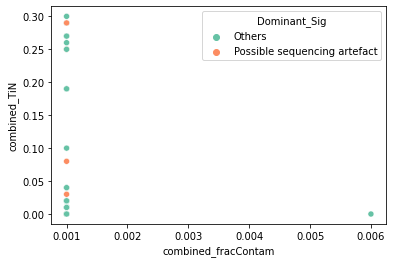

In [3]:
import seaborn as sns
metadata = pd.read_csv(f'{data_processed_folder}/CGA_WES_features.csv',index_col=0)
metadata['Dominant_Sig'] = 'Others'
metadata.loc[dt.aetiology_V3=='Possible sequencing artefact','Dominant_Sig']='Possible sequencing artefact'
ax = sns.scatterplot(data=metadata,
                     y='combined_TiN',x='combined_fracContam',
                     hue='Dominant_Sig',palette='Set2')

We expected that mutation signature `Defects in dna-dsb repair by hr` is one of dominat signature in our breast cancer data. Based on the table provided, it is noted that in 12 samples where the dominant signature is unidentified using the COSMIC version 3, this particular signature is recognized as the dominant one according to COSMIC version 2.

In [4]:
pt_oi = dt.index[(dt.aetiology_V3=='Unknown')&
       (dt.aetiology=='Defects in dna-dsb repair by hr')]
dt.loc[pt_oi,:].sort_values('Sig_V3')

,Sig,aetiology,Sig_V3,aetiology_V3
Samples,,,,
RP-2423_16466_12_100118,Signature_3,Defects in dna-dsb repair by hr,SBS39,Unknown
RP-2423_16466_15_052319,Signature_3,Defects in dna-dsb repair by hr,SBS39,Unknown
RP-2423_16466_16_061119,Signature_3,Defects in dna-dsb repair by hr,SBS39,Unknown
RP-2423_16466_30_042221,Signature_3,Defects in dna-dsb repair by hr,SBS39,Unknown
RP-2423_16466_30_050321,Signature_3,Defects in dna-dsb repair by hr,SBS39,Unknown
RP-2423_16466_30_060321,Signature_3,Defects in dna-dsb repair by hr,SBS39,Unknown
RP-2423_16466_12_090418,Signature_3,Defects in dna-dsb repair by hr,SBS5,Unknown
RP-2423_16466_18_072519,Signature_3,Defects in dna-dsb repair by hr,SBS5,Unknown
RP-2423_16466_18_082219,Signature_3,Defects in dna-dsb repair by hr,SBS5,Unknown


we then went to the reconstruction plot for the first sample `RP-2423_16466_12_100118` and notice that two construction are reasonable.

Version 3
![RP-2423_16466_12_100118](../data/processed/SigProfilerAssignment_COSMIC_v3/Assignment_Solution/Activities/SampleReconstruction/WebPNGs/RP-2423_16466_12_100118.png)
Version 2
![RP-2423_16466_12_100118](../data/processed/SigProfilerAssignment_COSMIC_v2/Assignment_Solution/Activities/SampleReconstruction/WebPNGs/RP-2423_16466_12_100118.png)

Next, we compared the reconstruction metrics between V2 and V3.

In [5]:
stats_v2 = pd.read_csv(f'{data_processed_folder}/SigProfilerAssignment_COSMIC_v2/Assignment_Solution/Solution_Stats/Assignment_Solution_Samples_Stats.txt',
                       index_col=0,sep='\t')
stats_v3 = pd.read_csv(f'{data_processed_folder}/SigProfilerAssignment_COSMIC_v3/Assignment_Solution/Solution_Stats/Assignment_Solution_Samples_Stats.txt',
                       index_col=0,sep='\t')
stats_v3 .columns = stats_v3.columns +'_V3'
stats_dt = stats_v2.merge(stats_v3,left_index=True,right_index=True)

Although v2 generally results in slightly lower cosine similarity and correlation scores than v3, the absolute difference between the two is minimal.

In [6]:
metrics = 'Cosine Similarity'
data = stats_dt.loc[pt_oi,:].copy()
(data[metrics] - data[f"{metrics}_V3"]).sort_values()

Samples
RP-2423_16466_15_052319   -0.049
RP-2423_16466_18_082219   -0.048
RP-2423_16466_30_050321   -0.042
RP-2423_16466_19_081319   -0.026
RP-2423_16466_12_100118   -0.020
RP-2423_16466_18_072519   -0.019
RP-2423_16466_30_060321   -0.019
RP-2423_16466_8_032018    -0.014
RP-2423_16466_19_091019   -0.011
RP-2423_16466_16_061119   -0.007
RP-2423_16466_30_042221   -0.002
RP-2423_16466_12_090418    0.002
dtype: float64

In [7]:
metrics = 'Correlation'
data = stats_dt.loc[pt_oi,:].copy()
(data[metrics] - data[f"{metrics}_V3"]).sort_values()

Samples
RP-2423_16466_15_052319   -0.079
RP-2423_16466_18_082219   -0.067
RP-2423_16466_30_050321   -0.056
RP-2423_16466_12_100118   -0.050
RP-2423_16466_30_060321   -0.042
RP-2423_16466_19_081319   -0.038
RP-2423_16466_8_032018    -0.036
RP-2423_16466_30_042221   -0.035
RP-2423_16466_18_072519   -0.029
RP-2423_16466_19_091019   -0.017
RP-2423_16466_16_061119   -0.016
RP-2423_16466_12_090418    0.000
dtype: float64

## Conclusion:
1. v3 has relatively higher reconstruction performance than v2. 
2. v2 is more intepretable than v3.
3. v2 generated more expected mutational signature (Signature 3) on breast cancer data than v3. 